In [1]:
import pandas as pd
import numpy as np
import nltk
import re
import string

### For some reason, there are broken table tags in a lot of the tables below when they're rendered on Github. They don't actually look like that

In [2]:
df = pd.read_csv('../data/JEOPARDY_CSV.csv', encoding='utf-8')
# full_df = pd.read_csv('../data/JEOPARDY_CSV.csv', encoding='utf-8')
# print full_df.shape
# full_df.head()

In [3]:
# df = full_df.sample(frac=0.1)
# df.reset_index(drop=True, inplace=True)

In [4]:
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,$200,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,$200,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,$200,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,$200,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,$200,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [5]:
# Remove the dumb spaces
df.columns = ['Show Number', 'Air Date', 'Round', 'Category', 'Value', 'Question', 'Answer']

# Convert to Datetime
df['Air Date'] = pd.to_datetime(df['Air Date'])

# Clean out Value column
df['Value'] = df['Value'].str.replace('$','')
df['Value'] = df['Value'].str.replace(',','')
df['Value'] = df['Value'].apply(lambda x: None if x == 'None' else int(x))
df.head()

,Show Number,Air Date,Round,Category,Value,Question,Answer
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,The city of Yuma in this state has a record av...,Arizona
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams


In [6]:
df['Question'].value_counts()[0:5]

[audio clue]     17
[video clue]     14
[filler]          5
(audio clue)      5
Abigail Smith     4
Name: Question, dtype: int64

In [7]:
df.shape

(216930, 7)

In [8]:
# Drop some useless questions
df = df[df['Question'] != '[audio clue]']
df = df[df['Question'] != '[video clue]']
df = df[df['Question'] != '[filler]']
df = df[df['Question'] != '(audio clue)']

In [9]:
df.shape

(216889, 7)

In [10]:
# load nltk's English stopwords as variable called 'stopwords'
stopwords = nltk.corpus.stopwords.words('english')
print len(stopwords)
print stopwords[:10]

153
[u'i', u'me', u'my', u'myself', u'we', u'our', u'ours', u'ourselves', u'you', u'your']


In [11]:
# load nltk's SnowballStemmer as variabled 'stemmer'
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

In [12]:
# here I define a tokenizer and stemmer which returns the set of stems in the text that it is passed

def tokenize_and_stem(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    stems = [stemmer.stem(t) for t in filtered_tokens]
    return stems


def tokenize_only(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word.lower() for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent)]
    filtered_tokens = []
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    for token in tokens:
        if re.search('[a-zA-Z]', token):
            filtered_tokens.append(token)
    return filtered_tokens

In [13]:
def create_clean_columns(df):    
    df['clean_question'] = df['Question'].apply(cleanhtml)
    df['clean_answer'] = df['Answer'].apply(cleanhtml)
    df['clean_category'] = df['Category'].apply(cleanhtml)
    df['everything'] = df['clean_question']+' '+df['clean_answer']+' '+df['clean_category']
    return df

def cleanhtml(raw_html):
    cleanr = re.compile('<.*?>')
    cleantext = re.sub(cleanr, '', raw_html)
    cleantext = cleantext.replace('\n', '')
    cleantext = cleantext.replace('-', ' ')
#     cleantext = cleantext.translate(None, string.punctuation)
#     cleantext = cleantext.replace('\'', '')
    regex = re.compile('[%s]' % re.escape(string.punctuation))
    cleantext = regex.sub('', cleantext)
    cleantext = cleantext.lower()
    return cleantext

In [14]:
create_clean_columns(df)

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_category,everything
0,4680,2004-12-31,Jeopardy!,HISTORY,200.0,"For the last 8 years of his life, Galileo was ...",Copernicus,for the last 8 years of his life galileo was u...,copernicus,history,for the last 8 years of his life galileo was u...
1,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,200.0,No. 2: 1912 Olympian; football star at Carlisl...,Jim Thorpe,no 2 1912 olympian football star at carlisle i...,jim thorpe,espns top 10 all time athletes,no 2 1912 olympian football star at carlisle i...
2,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,200.0,The city of Yuma in this state has a record av...,Arizona,the city of yuma in this state has a record av...,arizona,everybody talks about it,the city of yuma in this state has a record av...
3,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,200.0,"In 1963, live on ""The Art Linkletter Show"", th...",McDonald's,in 1963 live on the art linkletter show this c...,mcdonalds,the company line,in 1963 live on the art linkletter show this c...
4,4680,2004-12-31,Jeopardy!,EPITAPHS & TRIBUTES,200.0,"Signer of the Dec. of Indep., framer of the Co...",John Adams,signer of the dec of indep framer of the const...,john adams,epitaphs tributes,signer of the dec of indep framer of the const...
5,4680,2004-12-31,Jeopardy!,3-LETTER WORDS,200.0,"In the title of an Aesop fable, this insect sh...",the ant,in the title of an aesop fable this insect sha...,the ant,3 letter words,in the title of an aesop fable this insect sha...
6,4680,2004-12-31,Jeopardy!,HISTORY,400.0,Built in 312 B.C. to link Rome & the South of ...,the Appian Way,built in 312 bc to link rome the south of ita...,the appian way,history,built in 312 bc to link rome the south of ita...
7,4680,2004-12-31,Jeopardy!,ESPN's TOP 10 ALL-TIME ATHLETES,400.0,"No. 8: 30 steals for the Birmingham Barons; 2,...",Michael Jordan,no 8 30 steals for the birmingham barons 2306 ...,michael jordan,espns top 10 all time athletes,no 8 30 steals for the birmingham barons 2306 ...
8,4680,2004-12-31,Jeopardy!,EVERYBODY TALKS ABOUT IT...,400.0,"In the winter of 1971-72, a record 1,122 inche...",Washington,in the winter of 1971 72 a record 1122 inches ...,washington,everybody talks about it,in the winter of 1971 72 a record 1122 inches ...
9,4680,2004-12-31,Jeopardy!,THE COMPANY LINE,400.0,This housewares store was named for the packag...,Crate & Barrel,this housewares store was named for the packag...,crate barrel,the company line,this housewares store was named for the packag...


In [15]:
questions = df['clean_question'].values
# questions = df['everything'].values
# categories = df['clean_category'].values
# answers = df['clean_answer'].values

In [16]:
nltk.tag.pos_tag(questions[0].split())

[(u'for', 'IN'),
 (u'the', 'DT'),
 (u'last', 'JJ'),
 (u'8', 'CD'),
 (u'years', 'NNS'),
 (u'of', 'IN'),
 (u'his', 'PRP$'),
 (u'life', 'NN'),
 (u'galileo', 'NN'),
 (u'was', 'VBD'),
 (u'under', 'IN'),
 (u'house', 'NN'),
 (u'arrest', 'NN'),
 (u'for', 'IN'),
 (u'espousing', 'VBG'),
 (u'this', 'DT'),
 (u'mans', 'VBZ'),
 (u'theory', 'NN')]

In [17]:
nouns_only = []
for i in range(len(questions)):
    nouns_only.append([w[0] for w in nltk.tag.pos_tag(questions[i].split()) if w[1] in ['NN', 'NNS', 'NNP', 'NNPS']])

In [18]:
for i in range(len(nouns_only)):
    nouns_only[i] = ' '.join(nouns_only[i])

In [19]:
nouns_only = filter(None, nouns_only)

In [20]:
#use extend so it's a big flat list of vocab
totalvocab_stemmed = []
totalvocab_tokenized = []
for i in questions:
    allwords_stemmed = tokenize_and_stem(i) #for each item in 'questions', tokenize/stem
    totalvocab_stemmed.extend(allwords_stemmed) #extend the 'totalvocab_stemmed' list
    
    allwords_tokenized = tokenize_only(i)
    totalvocab_tokenized.extend(allwords_tokenized)

In [21]:
parts = nltk.tag.pos_tag(totalvocab_tokenized)

In [22]:
vocab_frame = pd.DataFrame(totalvocab_tokenized, index = totalvocab_stemmed, columns=['Words'])

In [23]:
vocab_frame.shape

(3013774, 1)

In [24]:
vocab_frame.head(20)

,Words
for,for
the,the
last,last
year,years
of,of
his,his
life,life
galileo,galileo
was,was
under,under


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib

# tfidf_vectorizer = TfidfVectorizer(max_df=0.8, max_features=100000,
#                                  min_df=0.001, stop_words='english',
#                                  use_idf=True, tokenizer=tokenize_and_stem, ngram_range=(1,3))

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=50000, use_idf=True,
                                 tokenizer=tokenize_and_stem, ngram_range=(1,3))

# tfidf_vectorizer = TfidfVectorizer(stop_words='english',
#                                  tokenizer=tokenize_only, ngram_range=(1,3))

# %time tfidf_matrix = tfidf_vectorizer.fit_transform(questions)

%time tfidf_vectorizer.fit(questions)
# tfidf_vectorizer.fit(nouns_only)

# More memory efficient to dump the model and then load it
joblib.dump(tfidf_vectorizer, 'tfidf_test.pkl')

CPU times: user 1min 52s, sys: 696 ms, total: 1min 53s
Wall time: 1min 52s


['tfidf_test.pkl', 'tfidf_test.pkl_01.npy', 'tfidf_test.pkl_02.npy']

In [26]:
tfidf_vectorizer = joblib.load('tfidf_test.pkl')
%time tfidf_matrix = tfidf_vectorizer.transform(questions)
# tfidf_matrix = tfidf_vectorizer.transform(nouns_only)

CPU times: user 1min 36s, sys: 392 ms, total: 1min 36s
Wall time: 1min 35s


In [27]:
tfidf_matrix.shape

(216889, 50000)

In [28]:
terms = tfidf_vectorizer.get_feature_names()

In [29]:
# from sklearn.metrics.pairwise import cosine_similarity
# dist = 1 - cosine_similarity(tfidf_matrix)

In [30]:
# from sklearn.feature_extraction.text import CountVectorizer

# count_vectorizer = CountVectorizer(stop_words='english', max_features=100000)

In [31]:
from sklearn.metrics import silhouette_score

def silhouette_selection(x, k):
    scores = []
    for iteration in range(50, k, 10):
        print('Number of clusters: %s' % iteration)
#         km = KMeans(n_clusters=iteration)
#         km.fit(x)
#         sil_score = silhouette_score(x, km.labels_)
        agglo = AgglomerativeClustering(n_clusters=iteration)
        agglo.fit(tsvd_matrix)
        sil_score = silhouette_score(x, agglo.labels_)
        print(sil_score)
        scores.append((iteration, sil_score))
    return scores

In [32]:
# sil_scores = silhouette_selection(tfidf_matrix, 160)

In [33]:
# min([x[1] for x in sil_scores])

In [34]:
from sklearn.decomposition import TruncatedSVD

tsvd = TruncatedSVD(n_components=2)
%time tsvd.fit(tfidf_matrix)
joblib.dump(tsvd, 'tsvd.pkl')

CPU times: user 1.05 s, sys: 16 ms, total: 1.06 s
Wall time: 857 ms


['tsvd.pkl', 'tsvd.pkl_01.npy', 'tsvd.pkl_02.npy', 'tsvd.pkl_03.npy']

In [35]:
tsvd = joblib.load('tsvd.pkl')
%time tsvd_matrix = tsvd.transform(tfidf_matrix)

CPU times: user 32 ms, sys: 0 ns, total: 32 ms
Wall time: 14.6 ms


In [36]:
# tsvd.explained_variance_ratio_

In [37]:
np.cumsum(tsvd.explained_variance_ratio_)

array([ 0.00066402,  0.00220576])

In [38]:
from sklearn.cluster import KMeans, MiniBatchKMeans, AgglomerativeClustering, DBSCAN

num_clusters = 100

In [39]:
km = KMeans(n_clusters=num_clusters, n_jobs=-1)
# minikm = MiniBatchKMeans(n_clusters=num_clusters)
# agglo = AgglomerativeClustering(n_clusters=num_clusters)
# db = DBSCAN(eps=0.3, min_samples=10)

%time km.fit(tfidf_matrix)
# %time minikm.fit(tfidf_matrix)
# %time agglo.fit(tsvd_matrix)
# %time db.fit(tfidf_matrix)

clusters = km.labels_.tolist()
# clusters = minikm.labels_.tolist()
# clusters = agglo.labels_.tolist()
# clusters = db.labels_.tolist()

CPU times: user 2.01 s, sys: 660 ms, total: 2.67 s
Wall time: 8min 22s


In [40]:
tsvd_matrix.shape

(216889, 2)

In [41]:
agglo = AgglomerativeClustering(n_clusters=num_clusters)#, memory=joblib.Memory(cachedir='/tmp/memory_cache'))

In [42]:
%time agglo.fit(tsvd_matrix)
clusters = agglo.labels_.tolist()

MemoryError: 

In [39]:
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

In [40]:
# db = DBSCAN(eps=0.3, min_samples=10).fit(X)
# core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
# core_samples_mask[db.core_sample_indices_] = True
# labels = db.labels_

# # Number of clusters in labels, ignoring noise if present.
# n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

# print('Estimated number of clusters: %d' % n_clusters_)
# print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
# print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
# print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
# print("Adjusted Rand Index: %0.3f"
#       % metrics.adjusted_rand_score(labels_true, labels))
# print("Adjusted Mutual Information: %0.3f"
#       % metrics.adjusted_mutual_info_score(labels_true, labels))
# print("Silhouette Coefficient: %0.3f"
#       % metrics.silhouette_score(X, labels))


In [41]:
# km.predict(df['clean_question'].values)

In [65]:
df['Cluster'] = clusters

In [66]:
df['Cluster'].value_counts()

30    73141
68     3251
95     3134
31     3043
27     2932
93     2932
6      2930
44     2922
28     2625
12     2596
15     2579
65     2446
22     2332
92     2325
11     2280
76     2250
5      2248
18     2193
43     2131
70     2121
41     2105
36     2102
75     2049
74     2032
21     2016
25     1958
94     1945
48     1903
16     1839
29     1826
      ...  
83      982
35      978
26      949
99      948
45      901
91      900
86      893
90      891
81      880
50      861
84      846
67      842
58      831
46      822
54      785
23      781
19      775
32      773
63      771
20      716
79      698
96      679
62      655
38      556
0       556
88      502
34      494
42      491
51      452
3       382
Name: Cluster, dtype: int64

In [139]:
df[df['Cluster'] == 0]

,Show Number,Air Date,Round,Category,Value,Question,Answer,clean_question,clean_answer,clean_category,everything,Cluster
5003,6021,2010-11-15,Jeopardy!,STATE FACTS,1000.0,The city of Tahlequah in this state is the cap...,Oklahoma,the city of tahlequah in this state is the cap...,oklahoma,state facts,the city of tahlequah in this state is the cap...,0
8446,2576,1995-11-13,Jeopardy!,NEVADA,500.0,The state capital was named for this man,"Christopher ""Kit"" Carson",the state capital was named for this man,christopher kit carson,nevada,the state capital was named for this man chris...,0
9536,4,1984-09-13,Double Jeopardy!,STATE CAPITALS,600.0,"1 of 4 state capitals that end in word ""City""","(1 of) Salt Lake City, Oklahoma City, Jefferso...",1 of 4 state capitals that end in word city,1 of salt lake city oklahoma city jefferson ci...,state capitals,1 of 4 state capitals that end in word city 1 ...,0
11187,4524,2004-04-15,Double Jeopardy!,"FUN IN THE ""SON""",1600.0,Hermosillo is the capital city of this Mexican...,Sonora,hermosillo is the capital city of this mexican...,sonora,fun in the son,hermosillo is the capital city of this mexican...,0
18496,4755,2005-04-15,Jeopardy!,ALPHABETICALLY FIRST,200.0,...among the 50 states,Alabama,among the 50 states,alabama,alphabetically first,among the 50 states alabama alphabetically first,0


In [38]:
# from sklearn.metrics import silhouette_score

# silhouette_score(tfidf_matrix, km.labels_)

In [39]:
from __future__ import print_function

cluster_words = []
print("Top terms per cluster:")
print()
order_centroids = km.cluster_centers_.argsort()[:, ::-1] 

for i in range(num_clusters):
    print("Cluster %d words:" % i, end='')
    cluster_words.append([])
    for ind in order_centroids[i, :10]: #replace 10 with n words per cluster
#         print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0], end=',')
        print(' %s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'), end=',')
#         cluster_words[i].append('%s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0])
        cluster_words[i].append('%s' % vocab_frame.ix[terms[ind].split(' ')].values.tolist()[0][0].encode('utf-8', 'ignore'))
    print() #add whitespace
    print() #add whitespace
    
#     print("Cluster %d categories:" % i, end='')
#     for cat in df.ix[i]['Category']#.values.tolist():
#         print(' %s,' % title, end='')
#     print() #add whitespace
#     print() #add whitespace
    
# print()
# print()

Top terms per cluster:

Cluster 0 words: led, democrats, convention, protested, anti, republicans, attacks, war, arrested, senator,

Cluster 1 words: games, board, cards, cards, board, player, played, video, video, games,

Cluster 2 words: disney, disney, film, dwarf, disney, disney, character, character, voices, hes,

Cluster 3 words: states, united, united, secretary, states, governor, became, secretary, only, senator,

Cluster 4 words: movie, played, tv, tv, title, star, film, movie, actor, seen,

Cluster 5 words: known, best, best, better, better, once, islands, islands, dancing, known,

Cluster 6 words: book, published, book, bible, title, series, published, wrote, wrote, testament,

Cluster 7 words: 19th, 19th, century, 19th, c, early, early, seen, german, late,

Cluster 8 words: high, high, school, student, fly, rock, graduate, face, seen, theyre,

Cluster 9 words: university, college, city, states, home, campus, states, school, university, university,

Cluster 10 words: man, fa

In [40]:
len(cluster_words)

110

In [41]:
cluster_names = []

for item in cluster_words:
    string = ''
    for i in item:
        string += i
        string += ' '
    cluster_names.append(string)

In [42]:
cluster_names

['led democrats convention protested anti republicans attacks war arrested senator ',
 'games board cards cards board player played video video games ',
 'disney disney film dwarf disney disney character character voices hes ',
 'states united united secretary states governor became secretary only senator ',
 'movie played tv tv title star film movie actor seen ',
 'known best best better better once islands islands dancing known ',
 'book published book bible title series published wrote wrote testament ',
 '19th 19th century 19th c early early seen german late ',
 'high high school student fly rock graduate face seen theyre ',
 'university college city states home campus states school university university ',
 'man famous known say young man said lived once man ',
 'french old term english old come french french word type ',
 'color blue color hair cornflower gem prize referred sea shades ',
 'miles square square miles miles long widely only cover cover ',
 'born body heavenly heaven

### Visualization attempts - This is pretty terrible

In [122]:
from sklearn.manifold import TSNE

In [123]:
tsvd_matrix.shape

(21689, 5)

In [125]:
tsne = TSNE()

tsne.fit(tsvd_matrix)
joblib.dump(tsne, 'tsne.pkl')

MemoryError: 

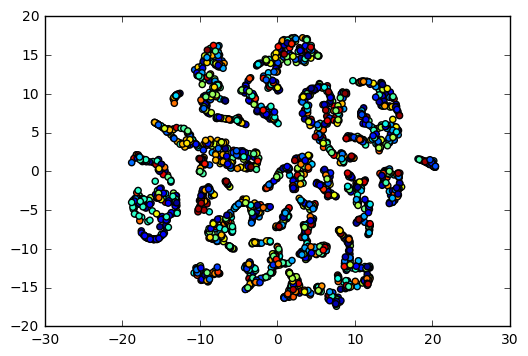

In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(graphing_data[:,0], graphing_data[:,1], c=clusters) 

In [39]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)

xs, ys = pos[:, 0], pos[:, 1]

NameError: name 'dist' is not defined

In [79]:
cluster_dict = dict(zip(range(50), cluster_names))

In [80]:
cluster_dict

{0: 'king bc boy old became ',
 1: 'century law called refers man ',
 2: 'one like makes great round ',
 3: 'back north military vietnams january ',
 4: 'played broadway william roles film ',
 5: 'name take holidays may observances ',
 6: 'new served works parts corn ',
 7: 'president party history us members ',
 8: 'collection little san museum circus ',
 9: 'tv movies stars temple played ',
 10: 'composers born daughter virginia italian ',
 11: 'music piece blue title movies ',
 12: 'unit busy canada unit state ',
 13: 'women last gold wins speed ',
 14: 'country miles spain europe african ',
 15: 'food types drinking small cheese ',
 16: 'island flag jack ship show ',
 17: 'x stand clue crew kelly ',
 18: 'mrs smith book mr joseph ',
 19: 'during camps california wwii sites ',
 20: 'authors john presidential englands why ',
 21: 'means e odd way word ',
 22: 'first pass moor thing became ',
 23: 'dogs sea days one alone ',
 24: 'russian word word means fight ',
 25: 'hall dress bar 

In [81]:
#set up colors per clusters using a dict
cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3', 3: '#e7298a', 4: '#66a61e'}

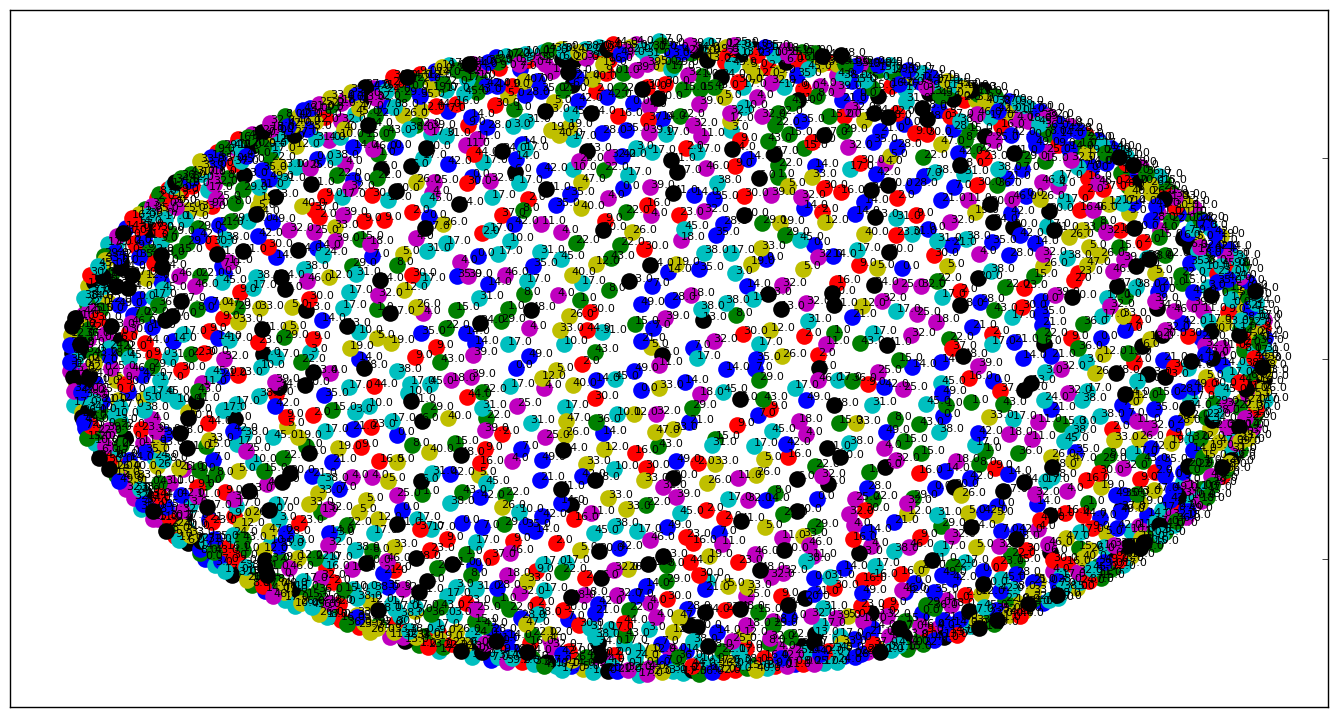

In [83]:
#create data frame that has the result of the MDS plus the cluster numbers and titles
plot_df = pd.DataFrame(dict(x=xs, y=ys, label=clusters, title=clusters)) 

#group by cluster
groups = plot_df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
            label=cluster_names[name], #color=cluster_colors[name], 
            mec='none')
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelleft='off')
    
# ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
for i in range(len(plot_df)):
    ax.text(plot_df.ix[i]['x'], plot_df.ix[i]['y'], plot_df.ix[i]['title'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_small_noaxes.png', dpi=200)

### LDA Attempts - work in progress

In [44]:
#strip any proper names from a text...unfortunately right now this is yanking the first word from a sentence too.
def strip_proppers(text):
    # first tokenize by sentence, then by word to ensure that punctuation is caught as it's own token
    tokens = [word for sent in nltk.sent_tokenize(text) for word in nltk.word_tokenize(sent) if word.islower()]
#     return "".join([" "+i if not i.startswith("'") and i not in string.punctuation else i for i in tokens]).strip()
    return "".join([" "+i if not i.startswith("'") else i for i in tokens]).strip()

In [45]:
#strip any proper nouns (NNP) or plural proper nouns (NNPS) from a text
from nltk.tag import pos_tag

def strip_proppers_POS(text):
    tagged = pos_tag(text.split()) #use NLTK's part of speech tagger
    non_propernouns = [word for word,pos in tagged if pos != 'NNP' and pos != 'NNPS']
    return non_propernouns

In [46]:
from gensim import corpora, models, similarities 

#remove proper names
%time preprocess = [strip_proppers(doc) for doc in questions]

#tokenize
%time tokenized_text = [tokenize_and_stem(text) for text in preprocess]

#remove stop words
%time texts = [[word for word in text if word not in stopwords] for text in tokenized_text]

CPU times: user 4.07 s, sys: 84 ms, total: 4.15 s
Wall time: 4.07 s
CPU times: user 8.95 s, sys: 88 ms, total: 9.04 s
Wall time: 8.92 s
CPU times: user 1.17 s, sys: 36 ms, total: 1.2 s
Wall time: 1.16 s


In [47]:
#create a Gensim dictionary from the texts
dictionary = corpora.Dictionary(texts)

#remove extremes (similar to the min/max df step used when creating the tf-idf matrix)
dictionary.filter_extremes(no_below=1, no_above=0.8)

#convert the dictionary to a bag of words corpus for reference
corpus = [dictionary.doc2bow(text) for text in texts]

In [93]:
# %time lda = models.LdaModel(corpus, num_topics=100, id2word=dictionary, update_every=5, chunksize=10000, passes=100)
%time lda = models.LdaModel(corpus, num_topics=num_clusters, id2word=dictionary)

CPU times: user 1min 29s, sys: 96 ms, total: 1min 29s
Wall time: 1min 29s


In [92]:
len(lda.show_topics(formatted=False, num_words=20))

10

In [90]:
print(lda[corpus[0]])


topics = lda.print_topics(5, num_words=20)

topics_matrix = lda.show_topics(formatted=False, num_words=20)
# topics_matrix

topics_matrix = np.array(topics_matrix)

# topics_matrix.shape

# topic_words = topics_matrix[:,:,1]

# for i in topic_words:
#     print([str(word) for word in i])
#     print()

[(17, 0.096564489476415466), (21, 0.10012970706422504), (36, 0.33243857942116972), (53, 0.10033141006375756), (54, 0.096667368670198289), (57, 0.097761328610371082), (81, 0.091561662148409592)]


ValueError: setting an array element with a sequence

In [63]:
lda.show_topics()

[(53,
  u'0.117*work + 0.075*hit + 0.054*featur + 0.043*refer + 0.042*major + 0.041*unit + 0.038*well + 0.038*blue + 0.026*michael + 0.021*bob'),
 (21,
  u'0.076*danc + 0.041*cook + 0.035*januari + 0.031*dish + 0.030*egg + 0.027*creatur + 0.025*coach + 0.024*johnni + 0.023*structur + 0.020*name'),
 (69,
  u'0.138*french + 0.074*black + 0.053*north + 0.044*common + 0.033*wear + 0.032*fine + 0.025*name + 0.018*one + 0.017*experi + 0.016*bit'),
 (49,
  u'0.135*wrote + 0.073*start + 0.052*young + 0.040*earth + 0.027*giant + 0.025*wall + 0.021*winter + 0.018*drive + 0.016*fought + 0.015*rome'),
 (62,
  u'0.074*life + 0.061*nicknam + 0.056*kill + 0.054*record + 0.046*fire + 0.041*singer + 0.031*season + 0.031*real + 0.030*control + 0.021*stage'),
 (17,
  u'0.126*presid + 0.084*hous + 0.063*open + 0.053*publish + 0.046*first + 0.034*franc + 0.034*california + 0.030*didnt + 0.028*christma + 0.022*next'),
 (64,
  u'0.081*game + 0.073*bird + 0.030*speci + 0.029*celebr + 0.025*ball + 0.022*festiv

In [75]:
topics_matrix = lda.show_topics(formatted=False, num_words=20)
# topics_matrix = np.array(topics_matrix)
topics_matrix

# topic_words = topics_matrix[:,:,1]
# for i in topic_words:
#     print([str(word) for word in i])
#     print()

[(24,
  [(u'number', 0.074651887616095675),
   (u'go', 0.067500155315878829),
   (u'anim', 0.066764931071219932),
   (u'member', 0.052872595387875337),
   (u'marri', 0.048343330490301831),
   (u'father', 0.048274644405873986),
   (u'would', 0.03904432375143442),
   (u'bear', 0.035297687422902506),
   (u'name', 0.026904521019100031),
   (u'episod', 0.017675872586571658),
   (u'card', 0.015804231188876326),
   (u'weather', 0.014128178466196645),
   (u'arthur', 0.013056963259891913),
   (u'whole', 0.012038782614099347),
   (u'properti', 0.0096324251672476255),
   (u'play', 0.00882432226427491),
   (u'edit', 0.0082124164324315994),
   (u'tail', 0.0082050257261730292),
   (u'happen', 0.008122361698017555),
   (u'specif', 0.0078009149336903932)]),
 (15,
  [(u'letter', 0.075913726603678053),
   (u'machin', 0.036683339993086476),
   (u'peter', 0.035247333026815417),
   (u'wine', 0.035142768612363859),
   (u'object', 0.033217077901473824),
   (u'learn', 0.031080948067850625),
   (u'special', 0.